<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod2/reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod2/reg.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>


__[Regression](https://en.wikipedia.org/wiki/Regression_analysis)__

_homl3 ch4_

- Linear Regression
  - The Normal Equation
  - Computational Complexity
  - Gradient Descent
    - Batch Gradient Descent
    - Stochastic Gradient Descent
    - Mini-Batch Gradient Descent
- Polynomial Regression
  - Learning Curves
  - Regularized Linear Models
    - Ridge Regression
    - Lasso Regression
    - Elastic Net Regression
    - Early Stopping
- Logistic Regression
  - Estimating Probabilities
  - Training and Cost Function
  - Decision Boundaries
  - Softmax Regression

What is regression?
---
Given $N$ samples $\lbrace (\vec{x_1},y_1),(\vec{x_2},y_2), ⋯, (\vec{x_N},y_N) \rbrace$, 
- $\vec{x_i}$: feature vector of sample $i$
  - $\vec{x_i}∈X$, sample or features space
- $y_i$: sample $i$'s target value, a real number
  - $y_i∈Y$, a subset of real number $R$

Training a machine learning model $m_{\vec{α}}: \hat{y}=m_{\vec{α}}(\vec{x},y)$ is the process of optimizing its parameter vector $\vec{α}=(α_1,α_2,⋯,α_M)$ in its parameter space $\mathcal{Α}$ to find the $\vec{α^*}$ which maximizes a scoring function $s:X×Y→R$,

$$\displaystyle s^*=argmax_{\vec{α^*} \in \mathcal{Α}} s(\hat{y},y)=argmax_{\vec{α^*} \in \mathcal{Α}} s(m(\vec{x},y),y)$$

- or minimize a cost function $c:X×Y→R$,

$$\displaystyle c^*=argmin_{\vec{α^*} \in \mathcal{Α}} c(\hat{y},y)=argmin_{\vec{α^*} \in \mathcal{Α}} c(m(\vec{x},y),y)$$

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression)
---
- estimates the linear relationship between 
  - a scalar response $y$ and 
  - $m$ iput features $x_1,x_2,⋯,x_m$ through $n$ samples
  - $((x_{i1}, x_{i2}, ⋯, x_{im}), y_i),\qquad i=1,\ldots ,n$
- by simply computing the estimation $\hat{y_{i}}$ of the true response $y_i$
  
  $${\displaystyle \hat{y_{i}}=\theta _{0}⋅1+\theta _{1}x_{i1}+\cdots +\theta _{m}x_{im}+\varepsilon_{i}}$$

  - a *weighted sum* of the input features 
  - plus a constant called the *bias term* $\theta _{0}$
    - also called the *intercept* term
  - and a disturbance term or error variable $\varepsilon$
    - an unobserved random variable, omitted below for simplification
- the calculation can be concisely noted in vector form

$$\hat{y_i}=h_{\vec{θ}}(\vec{x_i})=\vec{x_i}⋅\vec{θ}^T$$

  - ${h_{\vec{θ}}}$ is the hypothesis function with model parameters $\vec{θ}$
  - $\vec{θ}=(θ_0, θ_1, ⋯, θ_m)$ is the model’s parameter vector
  - $\vec{x_i}=(x_{i0}, x_{i1}, x_{i2}, ⋯, x_{im})$ is sample $i$'s feature vector, in which $x_{i0}$ is always 1
  - $\vec{x_i}⋅\vec{θ}$ is the *dot product* of vector $\vec{θ}\text{ and }\vec{x_i}$

Together, can be noted in a single matrix equation

$$\vec{\hat{y}}=X\vec{θ}$$

- $\vec{\hat{y}}=(\hat{y_1}, \hat{y_2}, ⋯, \hat{y_n})$
- ${\displaystyle \mathbf {X} ={\begin{bmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{bmatrix}}={\begin{bmatrix}1&x_{11}&\cdots &x_{1m}\\1&x_{21}&\cdots &x_{2m}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nm}\end{bmatrix}},}$

[mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)
---
A regression model can be evaluated with 
- *root mean square error (RMSE)* or simply 
- *mean square error (MSE)*

$$\displaystyle \operatorname{MSE}(X,h_{\vec{θ}})=||\vec{\hat{y}}-\vec{y}||^2=\frac{1}{n} \sum_{i=1}^n(\hat{y_i}-y_i)^2$$

The optimized $\vec{θ^*}$ that minimized the MSE has an analytical solution in the form of *the normal equation*

$${\displaystyle {\boldsymbol {\theta^* }}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y}}$$

⚠️ *a symbol with a head arrow or bold font both means a vector*

In [286]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds

🍎 A simle example

Given

- the linear regression model: $y=θ_0+θ_1x_1$
- and the the dataset generated with $y = 4 + 3x_1$ + Gaussian noise

Find the optimized parameters


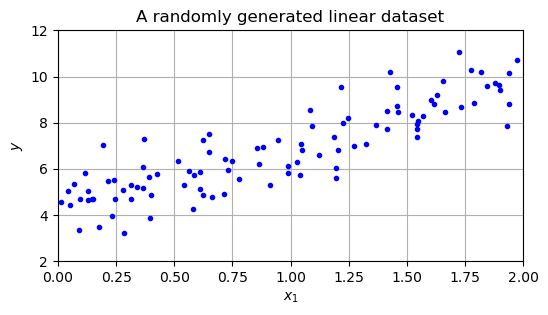

In [287]:

# 1. generate a toy data set with only one feature x1
np.random.seed(42) 
n = 100 
X = 2 * np.random.rand(n, 1) 
y = 4 + 3 * X + np.random.randn(n, 1) 

# 2. visualize the toy sata set
import matplotlib.pyplot as plt

fig1, axe1 = plt.subplots(figsize=(6, 3))
axe1.plot(X, y, "b.")
axe1.set(xlabel= "$x_1$", ylabel="$y$", title='A randomly generated linear dataset')
axe1.axis([0, 2, 2, 12])
axe1.grid()

In [288]:
# 3. Find the optimal parameters by the normal equation

X_b = np.c_[np.ones((n,1)),X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [289]:
# 4. make a prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

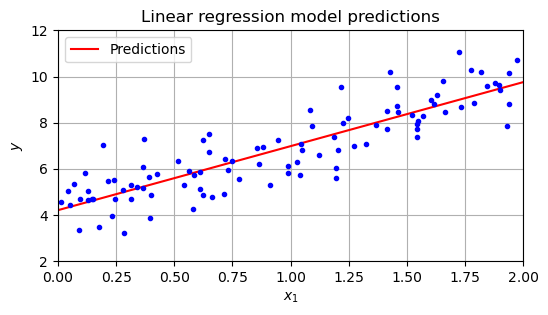

In [290]:
# 4. visualize the linear model
fig2, axe2 = plt.subplots(figsize=(6, 3))  # extra code – not needed, just formatting
axe2.plot(X_new, y_predict, "r-", label="Predictions")
axe2.plot(X, y, "b.")
axe2.set(xlabel="$x_1$", ylabel="$y$", title='Linear regression model predictions')
axe2.axis([0, 2, 2, 12])
axe2.grid()
axe2.legend(loc="upper left");

In [291]:
# 5. Find the optimized parameters using 
# the linear regression model in Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [292]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [293]:
# The LinearRegression class is based on 
# the np.linalg.lstsq() function 
# (the name stands for "least squares")
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- *np.linalg.lstsq()* computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ 
  - specifically the Moore-Penrose inverse 
    - can be computed with `np.linalg.pinv()` directly
- the Normal equation may not work if the matrix $\mathbf{X^T}\mathbf{X}$ is not invertible
  - but the pseudoinverse is always defined


In [294]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

Computational Complexity
---
Given a dataset with $n$ samples and $m$ features,

- to find the optimized parameters,
  - the Normal equation computes the inverse of $\mathbf{X^T}\mathbf{X}$
    - with complexity about $O(m^{2.4})$ to $O(m^2)$
  - the SVD approach used by Scikit-Learn’s LinearRegression class is about $O(m^2)$.
- to make predictions
  - the complexity is $O(n×m)$

[Gradient Descent (GD)](https://en.wikipedia.org/wiki/Gradient_descent)
---
- a method for unconstrained mathematical optimization
- it tweaks parameters iteratively in order to minimize the cost function $F(\vec {θ})$
  - along the direction of steepest descent, i.e.
  - the opposite direction of the current gradient of $F(\vec {θ})$
  - the subscript below means step

$${\displaystyle \vec {θ} _{n+1}=\vec {θ} _{n}-\eta_n \nabla F(\vec {θ} _{n})}$$

- which generates a monotonic sequence 
    
$${\displaystyle F(\vec {θ} _{0})\geq F(\vec {θ} _{1})\geq F(\vec {θ} _{2})\geq \cdots}$$

- each iteration is called an *epoch*
- $\eta_n$ is the *learning rate* at step $n$
  - too small, slow to converge
  - too big, diverge possibly
  - usually set to be proportional to the change of the norm of the gradient
    - similar to *simulated annealing*
    - stop with a tolerance of the norm change
  - the function determining the learning rate at each iteration is called the
*learning schedule*
- once the gradient gets 0, a minimum is reached
- $\vec {θ}_{0}$ is randomly chosen, 
  - no guarantee of reaching global minimum if the function terrain is complex
  - for a convex function, there is only one global minimum
    - MSE cost function is a convex function
  - the shape of a convex function looks like a bowl
    - the bowl is elongated for features with different scales
    - it is better rescale all features to a similar scale
      - e.g. using StandardScaler in sklearn

Batch Gradient Descent (BGD)
---
- denote MSE as $F$, then its gradient vector is

$${\displaystyle \nabla F(\vec{θ})={\begin{bmatrix}{\frac {\partial F}{\partial θ_{0}}}(\vec{θ})\\{\frac {\partial F}{\partial θ_{1}}}(\vec{θ})\\\vdots \\{\frac {\partial F}{\partial θ_{m}}}(\vec{θ})\end{bmatrix}}}=\frac{2}{n}{\mathbf{X^T(X\boldsymbol{θ}-y)}}$$
  - $\mathbf{X}$ is the full training set, so the algorithm is called *batch gradient descent*
  - for a linear regression model with many features, 
    - BGD is much faster than Normal equation and SVD

In [295]:
# 1. a quick implementation of of BGD
eta = 0.1  
n_epochs = 1000 # ⚠️ note down this number, compare with SGD later
n = len(X_b)  

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / n * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

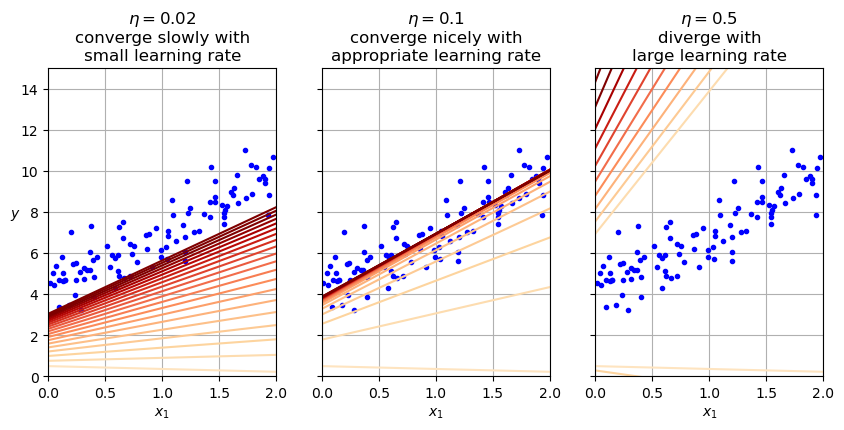

In [296]:
# 2. learning rate and convergence
# The line at the bottom of each plot represents the random starting point,
# then each epoch is represented by a darker and darker line

def plot_gradient_descent(ax, theta, eta, msg=''):
    n = len(X_b)
    ax.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            ax.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / n * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    ax.axis([0, 2, 0, 15])
    ax.grid()
    ax.set(xlabel="$x_1$", title=f"$\eta = {eta}$\n{msg}")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

fig3, axe3 = plt.subplots(1,3, figsize=(10, 4))

plot_gradient_descent(axe3[0], theta, eta=0.02, msg='converge slowly with\nsmall learning rate')
axe3[0].set_ylabel("$y$", rotation=0)

theta_path_bgd = plot_gradient_descent(axe3[1], theta, eta=0.1, msg='converge nicely with\nappropriate learning rate')
axe3[1].set_yticklabels([])

axe3[2].set_yticklabels([])
plot_gradient_descent(axe3[2], theta, eta=0.5, msg='diverge with\nlarge learning rate');

Stochastic Gradient Descent (SGD)
---
- BGD gets slower with larger training dataset since
  - it uses the whole training set to compute the gradient at every step
- SGD computes the gradient with only *a randomly chosen sample* at each step
  - moves irregularly due to its stochastic nature
  - the cost function may bounce up and down
    - decreasing only on average
    - bounce around even close to the minimum
    - possibly bounce off from a local minimum to find the global minimum
  - the training set should be shuffled first

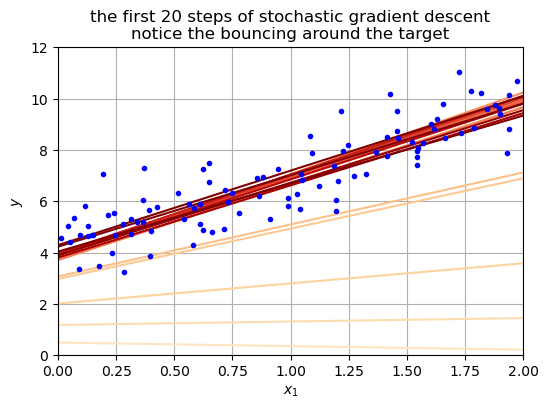

In [297]:
# 1. SGD with a simple schedule
theta_path_sgd = []

n_epochs = 50

# a simple learning schedule hyperparameters
def learning_schedule(iter, p0=5, p1=50):
    return p0 / (iter + p1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

# 2. visualize the path of theta in the parameter space
n_shown = 20 
fig4, axe4 = plt.subplots(figsize=(6, 4)) 

for epoch in range(n_epochs):
    for iteration in range(n):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            axe4.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(n)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by n
        eta = learning_schedule(epoch * n + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) 

axe4.plot(X, y, "b.")
axe4.set(xlabel = "$x_1$", ylabel ="$y$", 
         title='the first 20 steps of stochastic gradient descent\nnotice the bouncing around the target')
axe4.axis([0, 2, 0, 12])
axe4.grid()


In [298]:
# 3. get a good result with only 50 epoches while BGD needs 1000 epoches
theta

array([[4.21076011],
       [2.74856079]])

In [299]:
# 4. SGDRegressor - SGD from Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [300]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

Mini-Batch Gradient Descent (MBGD)
---
- a trade-off between BGD and SGD
- MBGD computes the gradients on small random sets of instances called mini-batches
  - parameter path is less erratic than SGD
  - can get a performance boost over SGD from hardware optimization of matrix operations
  - but may be harder to escape from local minima

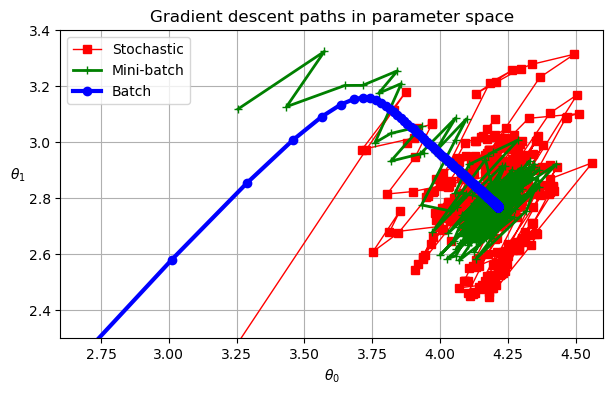

In [301]:
# 1. A comparison of approaching-target behavior for BGD, SGD and MBGD
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(n / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

p0, p1 = 200, 1000  # learning schedule hyperparameters

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(n)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration, p0, p1)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

fig5, axes5 = plt.subplots(figsize=(7, 4))
axes5.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
axes5.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
axes5.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
axes5.legend(loc="upper left")
axes5.set_xlabel(r"$\theta_0$")
axes5.set_ylabel(r"$\theta_1$   ", rotation=0)
axes5.set_title('Gradient descent paths in parameter space')
axes5.axis([2.6, 4.6, 2.3, 3.4])
axes5.grid()

- all end up near the minimum
- BGD’s path actually stops at the minimum
  - take more time than MBGD and SGD
- both SGD and MBGD continue to walk around
  - can be fixed with a good learning schedule

Comparison of algorithms for linear regression
---
Given n samples, each with m features

| Algorithm | Large n | out-of-core<br>support | Large m |  Hyper-parameters |  Scalable |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Normal equation | Fast |  No |  Slow | 0 | No |
| SVD | Fast | No | Slow |  0 |  No | 
| Batch GD | Slow |  No | Fast | 2 | Yes |
| Stochastic GD |  Fast | Yes | Fast | ≥2 |  Yes |
| Mini-batch GD |  Fast | Yes | Fast |  ≥2 | Yes|

Polynomial Regression
---
- fits nonlinear dataset by adding powers of each feature as new features
  - then train a linear model on this extended set of features
-  capable of finding relationships between features
  - by adding all combinations of features up to the given degree
    - e.x. given two features $[x_1,x_2]$ and degree 2, 
    - the expanded features are $[1, x_1,x_2, x_1^2, x_1x_2, x_2^2]$
  - sklearn PolynomialFeatures(degree=d) extends n features to $\displaystyle {{n+d}\choose{n}} = \frac{(n+d)!}{n!d!}$ features
    - Beware of the combinatorial explosion of new features

🍎 Fit a toy quadratic dataset $y=θ_0 + θ_1x + θ_2x^2$ + Gaussian noise

In [302]:
# 1. generate a toy quadratic dataset
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

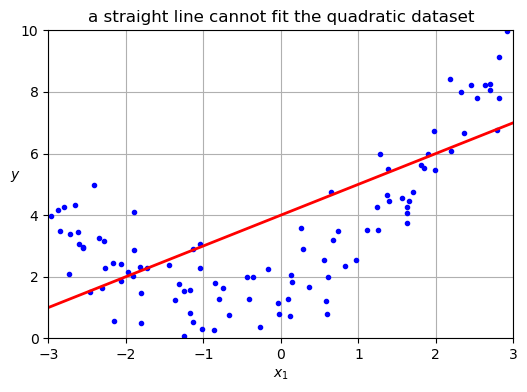

In [303]:
# 2. visualize the quadratic dataset
fig6, axes6 = plt.subplots(figsize=(6, 4))
axes6.plot(X, y, "b.")
axes6.plot([-3,3], [1,7],'r-', linewidth=2)
axes6.set_xlabel("$x_1$")
axes6.set_ylabel("$y$", rotation=0)
axes6.set_title('a straight line cannot fit the quadratic dataset')
axes6.axis([-3, 3, 0, 10])
axes6.grid()

In [304]:
# 3. add polynomial features with sklearn PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
# adding the square (degree=2) of each feature
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0:2], X_poly[0:2]

(array([[-0.75275929],
        [ 2.70428584]]),
 array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ]]))

In [305]:
# 4. fit the extended dataset
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

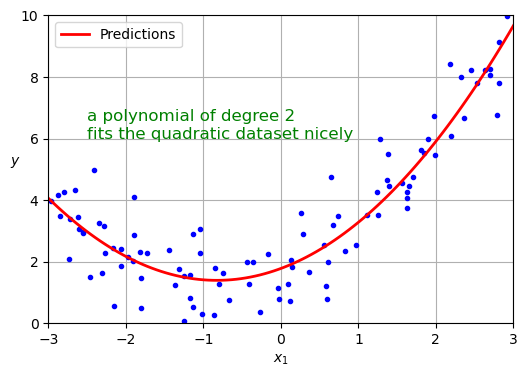

In [306]:
# 5. visualize the new model

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

fig7, axes7 = plt.subplots(figsize=(6, 4))
axes7.plot(X, y, "b.")
axes7.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
axes7.set_xlabel("$x_1$")
axes7.set_ylabel("$y$", rotation=0)
axes7.text(-2.5, 6, 'a polynomial of degree 2 \nfits the quadratic dataset nicely', 
           color='green', fontsize=12)
axes7.legend(loc="upper left")
axes7.axis([-3, 3, 0, 10])
axes7.grid()


⚠️ it is still a linear model, just fits the extended dataset with added polynomial features

- original dataset: $y = 0.5x^2 + 1⋅x + 2$ + Gaussian noise
- the model: $\hat{y} = 0.56x^2 + 0.93x + 1.78$

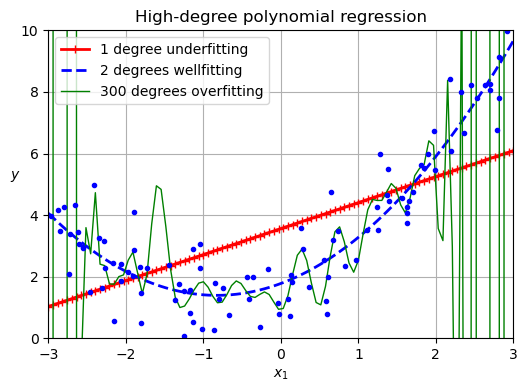

In [307]:
# A problem of underfitting and overfitting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

fig8, axes8 = plt.subplots(figsize=(6, 4))
fitting = ['underfitting', 'wellfitting', 'overfitting']
i = 0
for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"+ " " + fitting[i]
    i += 1
    axes8.plot(X_new, y_newbig, style, label=label, linewidth=width)

axes8.plot(X, y, "b.", linewidth=3)
axes8.legend(loc="upper left")
axes8.set_xlabel("$x_1$")
axes8.set_ylabel("$y$", rotation=0)
axes8.set_title('High-degree polynomial regression')
axes8.axis([-3, 3, 0, 10])
axes8.grid()

How to determine underfitting and overfitting?
---
two methods

1. estimate the model's generalization performance with cross-validation
  - wellfitting if the model performs well on both the training set and the test set
  - underfitting if the model performs bad on both the training set and the test set
  - overfitting if the model performs well on the training set but bad on the test set
2. compare training error and validation error with *learning curves*
  - a learning curve plots a model’s training error and validation error as a function of the training iteration, you may
    - retrain the model on growing subsets of the training set, or
    - train the model incrementally if it supports partial_fit() or warm_start

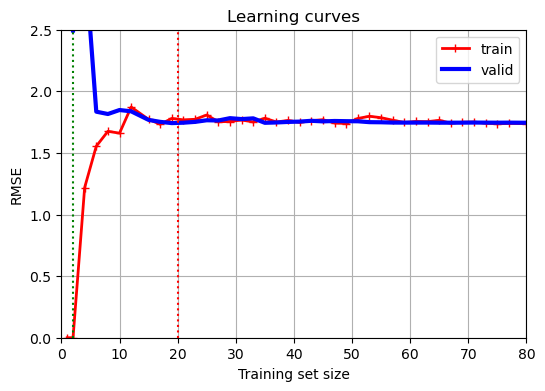

In [308]:
# 1. demonstrate underfitting with the plain linear regression model
# i.e. degree = 1
from sklearn.model_selection import learning_curve

# 1.1 train the model
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# 1.2 visualize the learning curve
fig9, axes9 = plt.subplots(figsize=(6, 4)) 
axes9.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
axes9.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
axes9.vlines([2, 20], [0,0], [2.5, 2.5], ['green','red'], 'dotted')
axes9.set_xlabel("Training set size")
axes9.set_ylabel("RMSE")
axes9.set_title('Learning curves')
axes9.grid()
axes9.legend(loc="upper right")
axes9.axis([0, 80, 0, 2.5]);

- when there are just ≤ 2 samples, the training error is 0 but the validation error is very high
- with more samples added, the model cannot generalize well, both the training error and validation error reaches a fairly high plateau
- underfitting cannot be fixed by simply training with more samples
- better models and better features will help

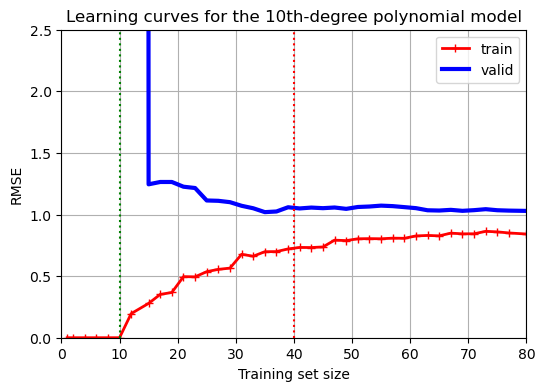

In [309]:
# 2. demonstrate overfitting with a 10th-degree polynomial model on the same dataset
from sklearn.pipeline import make_pipeline

# 2.1 train the model
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

# 2.2 visualize the learning curve
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

figa, axesa = plt.subplots(figsize=(6, 4))
axesa.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
axesa.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
axesa.vlines([10, 40], [0,0], [2.5, 2.5], ['green','red'], 'dotted')
axesa.legend(loc="upper right")
axesa.set_xlabel("Training set size")
axesa.set_ylabel("RMSE")
axesa.set_title('Learning curves for the 10th-degree polynomial model')
axesa.grid()
axesa.axis([0, 80, 0, 2.5]);

- The training error is much lower than the previous one
- There is a gap between the training error and validation error
  - a sign of overfitting: the model performs well on the training set but bad on the test set
- Overfitting could be improved with larger training set
  - until the validation error reaches the training error
- A theoretical conclusion:  
  - A model’s generalization error = bias error + variance error + irreducible error
  - Bias error is due to wrong assumption
    - can be reduced by increasing the model's degrees of freedom
  - Variance error is due to the model’s excessive sensitivity to small variations in the training set
    - can be reduced by reducing the model's degrees of freedom
  - A trade-off is needed between the bias error and variance error
  - Irreducible error is due to  the noisiness in the data
    - clean the dataset

Linear model regularization
---
Model regularization is a way to reduce overfitting by reducing degrees of freedom such as
- reduce the number of polynomial degrees for a polynomial model
- constrain the weights of the model for a linear model in three ways
  - ridge regression, lasso regression, and elastic net regression
  - they keep the model weights as small as possible
- regularization is applied only during training with features scaled
  - the model's performance should be evaluated with the unregularized MSE

[Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression)
---
- adds to the MSE a regularization term equal to $\displaystyle \frac{\alpha}{n}\sum_{i=1}^m\theta_i^2$
- the ridge regression cost function is $\displaystyle\mathbf{J(\boldsymbol{\theta})=MSE(\boldsymbol{\theta})}+\frac{\alpha}{n}\sum_{i=1}^m\theta_i^2$
- $α$, the hyperparameter controls how much to regularize the model
  - no regularization if $α=0$
  - all weights are suppressed close to zero if $α$ is very large
    - result is a flat line going through the data's mean
- $\displaystyle \frac{\alpha}{n}\sum_{i=1}^m\theta_i^2$ can be simply denoted as $\displaystyle\frac{α||\mathbf{w}||_2^2}{n}$, where
  - $\displaystyle ||\mathbf{w}||_2^2 = \sum_{i=1}^m\theta_i^2$ is the $\ell_2$ norm of feature vector $\mathbf{w}=\{θ_1, θ_2, ⋯, θ_m\}$

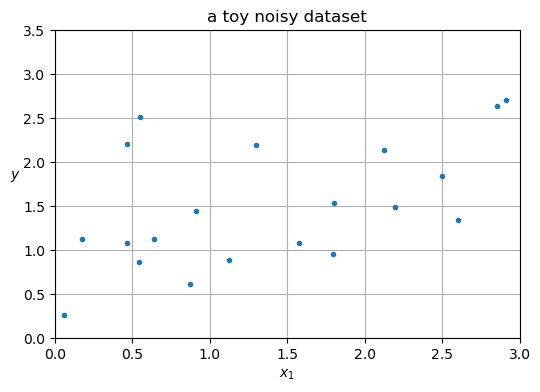

In [310]:
# 1.  several ridge models that were trained on some very noisy
# linear data using different α values
# 1.1 generate a toy noisy dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# 1.2 visualize the dataset
figb, axeb = plt.subplots(figsize=(6, 4))
axeb.plot(X, y, ".")
axeb.set_xlabel("$x_1$")
axeb.set_ylabel("$y$  ", rotation=0)
axeb.set_title('a toy noisy dataset')
axeb.axis([0, 3, 0, 3.5])
axeb.grid()

In [311]:
# 1.3 train a linear model with ridge regularization
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

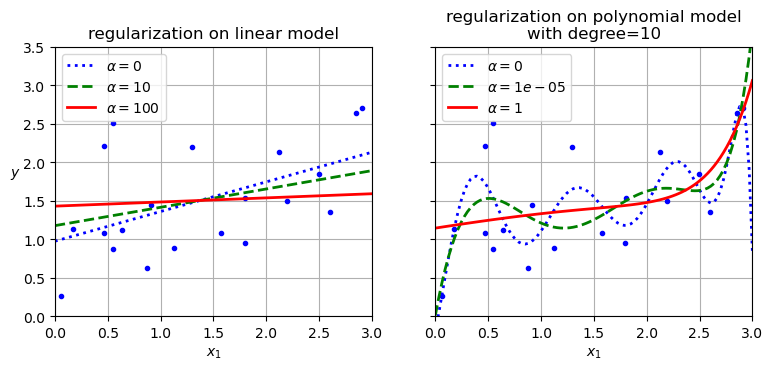

In [312]:
# 1.4 visualize ridge regressors with different α's
def plot_model(ax, model_class, polynomial, alphas, **model_kwargs):
    import copy
    models = []
    ax.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        models.append(copy.deepcopy(model))
        y_new_regul = model.predict(X_new)
        ax.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    ax.legend(loc="upper left")
    ax.set_xlabel("$x_1$")
    ax.axis([0, 3, 0, 3.5])
    ax.grid()
    return models

figc, axec = plt.subplots(1, 2, figsize=(9, 3.5))
plot_model(axec[0], Ridge, polynomial=0, alphas=(0, 10, 100), random_state=42)
axec[0].set_ylabel("$y$  ", rotation=0)
axec[0].set_title('regularization on linear model')
plot_model(axec[1], Ridge, polynomial=1, alphas=(0, 10**-5, 1), random_state=42)
axec[1].set_title('regularization on polynomial model\nwith degree=10')
axec[1].set_yticklabels([]);


- the larger the α, the flatter the model
  - i.e. model's variance decreased, but its bias increased

- for linear regression, ridge regression can be computed in 
  - either an analytical solution or gradient descent
- Ridge regression closed-form solution
$$\mathbf{\hat{\boldsymbol{θ}} = (X^TX+αA)^{-1}X^{T}y}$$

- $\mathbf{A}$ is the $(m + 1) × (m + 1)$ identity matrix,⁠  except with a 0 in the top-left
cell, corresponding to the bias term

In [313]:
# 1. perform ridge regression with SGD
# no automatic division by n in SGDRegressor so we set alpha=0.1 / n
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / n, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.intercept_, sgd_reg.coef_

(array([0.97336302]), array([0.386601]))

In [314]:
# 2.1. perform ridge regression using a closed-form solution with Scikit-Learn sag solver
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([[0.38286422]]))

In [315]:
# 2.2. perform ridge regression using the closed-form solution
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

Lasso Regression
---
- abbreviation of *least absolute shrinkage and selection operator regression*
- its regularization term is $2α\ell_1$
  - the $\ell_1$ norm of feature vector $\mathbf{w}=\{θ_1, θ_2, ⋯, θ_m\}$ equals $\displaystyle |\mathbf{w}|_1 = \sum_{i=1}^m|\theta_i|$
  - different norms lead to different factors
- the lasso regression cost function is $\displaystyle\mathbf{J(\boldsymbol{\theta})=MSE(\boldsymbol{\theta})}+2\alpha\sum_{i=1}^m|\theta_i|$

In [316]:
# 1. train lasso regressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([1.14537356]), array([0.26167212]))

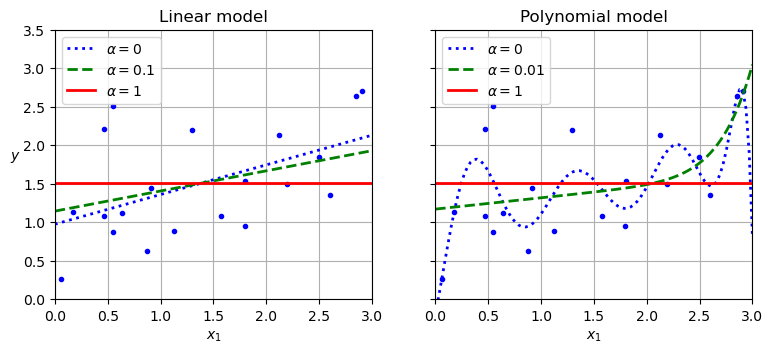

In [317]:
# 2. visualize lasso regressors with different α's 
figd, axed = plt.subplots(1, 2, figsize=(9, 3.5))

plot_model(axed[0], Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
axed[0].set_ylabel("$y$  ", rotation=0)
axed[0].set_title('Linear model')

lassoregs = plot_model(axed[1], Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
axed[1].set_title('Polynomial model')
axed[1].set_yticklabels([]);

- lasso regression tends to eliminate the weights of the least important features
  - i.e., set them to zero
  - automatically performs feature selection and outputs a sparse model with few nonzero feature weights

__Lasso versus ridge regularization__

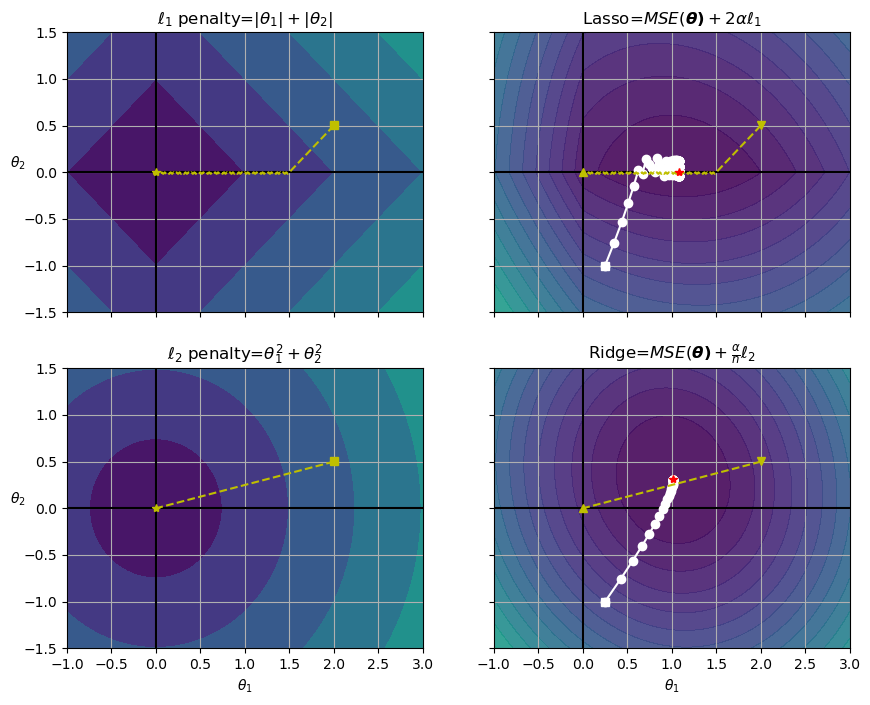

In [318]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fige, axee = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
lossfuns = [r'=$|\theta_1|+|\theta_2|$',r'=$\theta_1^2+\theta_2^2$']
costfuns = [r'=$MSE(\boldsymbol{\theta)}+2\alpha\ell_1$',r'=$MSE(\boldsymbol{\theta)}+\frac{\alpha}{n}\ell_2$']

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axee[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "y*")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty"+lossfuns[i])
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axee[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:1, 0], path_JR[:1, 1], "w-s")
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "y^")
    ax.plot(t1_min, t2_min, "yv")
    ax.plot(t1r_min, t2r_min, "r*")
    ax.set_title(title+costfuns[i])
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

__Lasso versus ridge regularization__

- the background contours represent 
  - different loss functions on the left column
  - different cost functions on the right column
- GD optimization paths on the left column
  - the yellow dashed lines from start (squares) to end (stars)
  - the minimum for both $\ell_1$ and $\ell_2$ losses is 0 at the origin
  - the gradient of $\ell_1$ are either -1 or 1 for each parameter
  - the gradient of $\ell_2$ are linear for each parameter
- GD optimization paths on the right column
  - the white lines from start (squres) to end (red stars)
  - the global minima move left when increasing α along the dashed yellow line
  - the global minima move right when decreasing α
- here, the optimal parameters for the unregularized MSE are $θ_1$ = 2 and $θ_2$ = 0.5
  - marked by the right downward triangles
- The lasso cost function is not differentiable at $θ_i = 0$
  - which can be fixed with a subgradient vector $\boldsymbol{g}$
  - Lasso regression subgradient vector
$${\displaystyle \mathbf{g(\boldsymbol{θ},J)=\nabla_{θ} MSE(\boldsymbol{θ})+2α{\begin{bmatrix}\operatorname{sign}(θ_1)\\\operatorname{sign}(θ_2)\\\vdots \\\operatorname{sign}(θ_n)\end{bmatrix}}} \text{ where }} \operatorname{sign}(θ_i)=\begin{cases}-1 &\text{ if } θ_i<0\\0 &\text{ if } θ_i=0\\+1 &\text{ if } θ_i>0\end{cases}$$

Elastic Net Regression
---
- a combination of ridge regression and lasso regression
- its regularization term is a weighted sum of both ridge and lasso’s regularization terms

$$\mathbf{J(\boldsymbol{θ})=\operatorname{MSE}(\boldsymbol{θ})+r(2α\ell_1)+(1-r)\frac{α}{n}ℓ_2}$$

__which regression should I use?__
  - plain linear regression should be avoided
  - ridge is a good default
  - lasso or elastic net is preferred if only a few features are useful
  - elastic net is generally preferred over lasso

Early Stopping
---
- when the validation error stops decreasing and starts to go back up 
  - it indicates that the model has started to overfit the training data
- stop training as soon as the validation error reaches a minimum

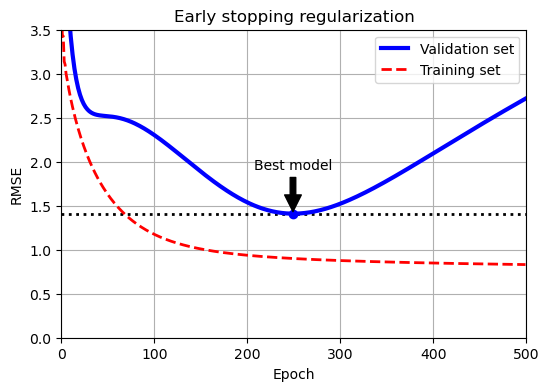

In [319]:
# A early stopping on the training on a quadratic dataset
from copy import deepcopy
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())

# 1. train the model
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], [] 

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse: # early stopping, save the best model
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# 2. visualize
best_epoch = np.argmin(val_errors)
figf, axef = plt.subplots(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
axef.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
axef.plot(val_errors, "b-", linewidth=3, label="Validation set")
axef.plot(best_epoch, best_valid_rmse, "bo")
axef.plot(train_errors, "r--", linewidth=2, label="Training set")
axef.legend(loc="upper right")
axef.set(xlabel="Epoch", ylabel="RMSE", title='Early stopping regularization')
axef.axis([0, n_epochs, 0, 3.5])
axef.grid()

Logistic Regression
---
- also called logit regression
- commonly used to estimate the probability that an instance belongs to a particular class
  - the probability ≥ a given threshold (typically 0.5) indicates positive y=1
  - otherwise negative y=0
- the probability is estimated with

$$\hat{p} = h_{\boldsymbol{θ}}(\mathbf{x}) = σ(\boldsymbol{θ}^T\mathbf{x})$$

- The logistic—noted σ(·)—is a sigmoid function
  - outputs a number between 0 and 1

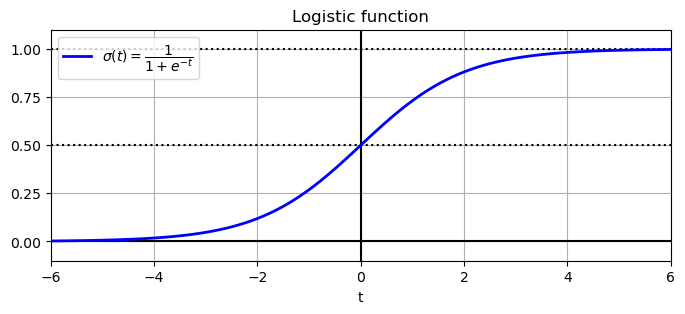

In [320]:
# logistic function

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

figg, axeg = plt.subplots(figsize=(8, 3))
axeg.plot([-lim, lim], [0, 0], "k-")
axeg.plot([-lim, lim], [0.5, 0.5], "k:")
axeg.plot([-lim, lim], [1, 1], "k:")
axeg.plot([0, 0], [-1.1, 1.1], "k-")
axeg.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
axeg.set_xlabel("t")
axeg.set_title('Logistic function')
axeg.legend()
axeg.axis([-lim, lim, -0.1, 1.1])
axeg.set_yticks([0, 0.25, 0.5, 0.75, 1])
axeg.grid()

Training and Cost Function
---
- set the parameter vector $\boldsymbol{θ}$ so that the model estimates 
   - high probabilities for positive instances (y = 1) and 
   - low probabilities for negative instances (y = 0)
- cost function of single training sample

$$\displaystyle c(\boldsymbol{θ})=\begin{cases}-\log(\hat{p}) &\text{ if } y=1\\-\log(1-\hat{p}) &\text{ if } y=0\end{cases}$$
- the cost is high for ambiguity and low for clarity
- the cost function over all samples is the  average cost over all training instances
  - called the *log loss*
$$\displaystyle \mathbf{J}(\boldsymbol{θ}) = -\frac{1}{n}\sum_{i=1}^n\left[y^{(i)}\log p^{(i)}+(1-y^{(i)})(1-p^{(i)})\right]=-\frac{1}{n}\sum_{i=1}^n\sum_{k=1}^2 y_k^{(i)}\log p_k^{(i)}$$
- there is no known analytical solution to find the value of $\boldsymbol{θ}$ that  minimizes this cost function
- but the log loss function is convex so it can be solved with GD
  - its partial derivative with respect to $θ_j$ is given by

$$\displaystyle \frac{∂}{∂θ_j}\mathbf{J}(\boldsymbol{θ}) = \frac{1}{n}\sum_{i=1}^n\left(σ\left(\boldsymbol{θ}^T\mathbf{x}^{(i)}\right)-y^{(i)}\right)x_j^{(i)}$$
- logistic regression models can be regularized using $\ell_1$ and $\ell_2$ penalties
  - used $\ell_2$ penalty by default in sklearn

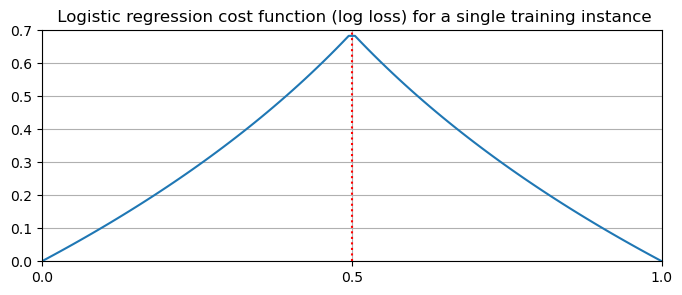

In [321]:
# the cost function
p = np.linspace(0,1,100)
c = np.r_[-np.log(1-p[:50]), -np.log(p[50:])]
figA, axeA = plt.subplots(figsize=(8,3))
axeA.plot(p,c)
axeA.grid()
axeA.vlines([.5],[0],[0.7], colors=['red'], linestyles=['dotted'])
axeA.axis([0,1,0,.7])
axeA.set_title(' Logistic regression cost function (log loss) for a single training instance')
axeA.set_xticks([0,0.5,1]);
  

Decision Boundaries
---

In [322]:
# 1. Show the Decision Boundaries of logistic regression
# on the iris dataset by building a classifier to detect 
# the Iris virginica type based only on the petal width feature

iris = skds.load_iris(as_frame=True)
list(iris)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. train a logistic regressor
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

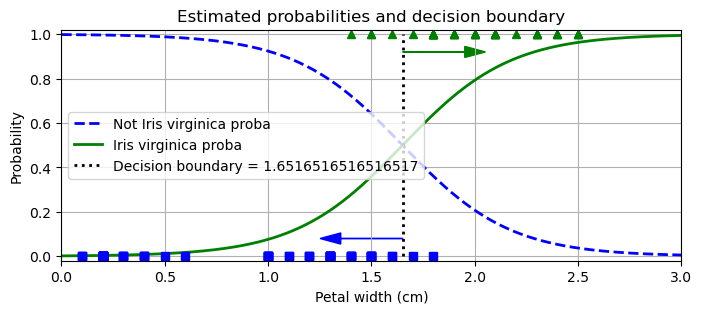

In [323]:
# 2. show the model’s estimated probabilities for flowers 
# with petal widths varying from 0 cm to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

figh, axeh = plt.subplots(figsize=(8, 3))
axeh.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
axeh.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
axeh.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label=f"Decision boundary = {decision_boundary}")

axeh.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
axeh.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
axeh.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
axeh.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
axeh.set(xlabel="Petal width (cm)", ylabel="Probability", title='Estimated probabilities and decision boundary')
axeh.legend(loc="center left")
axeh.axis([0, 3, -0.02, 1.02])
axeh.grid()

- with high confidence
  - petal width > 2cm, virginica 
  - petal width < 1cm, not virginica
- unsure in between
- on the decision boundary, both probabilities are 50%

In [324]:
decision_boundary, log_reg.predict([[1.7], [1.5]])

(1.6516516516516517, array([ True, False]))

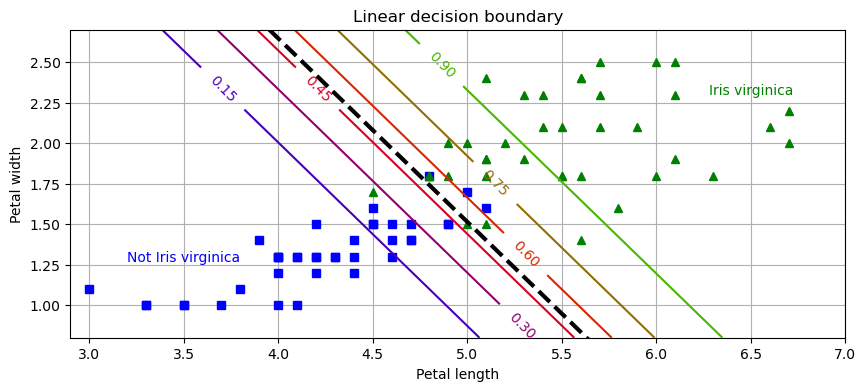

In [325]:
# train the model on two features

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

figi, axei = plt.subplots(figsize=(10, 4))
axei.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
axei.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
axei.clabel(contour, inline=1)
axei.plot(left_right, boundary, "k--", linewidth=3)
axei.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
axei.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
axei.set(xlabel="Petal length", ylabel="Petal width", title='Linear decision boundary')
axei.axis([2.9, 7, 0.8, 2.7])
axei.grid()

- the black dashed is the decision boundary, on which the estimated probability is 50%
- Each parallel line represents the points where the model outputs a specific probability
  - from 15% (bottom left) to 90% (top right)

Softmax Regression
---
- generalizes logistic regression model to support multiple classes directly
- also called multinomial logistic regression

Steps on classifying a given sample $\mathbf{x}$
1. for each class k, compute a score: $\displaystyle s_k(\mathbf{x})=\left(\boldsymbol{θ}^{(k)}\right)^T\mathbf{x}$
  - each class has its own dedicated parameter vector $\boldsymbol{θ}^{(k)}$
  - all these vectors are typically stored as rows in a parameter matrix $\boldsymbol{Θ}$
2. estimate the probability $p̂_k$ that the instance belongs to class k
$$\displaystyle p̂_k=σ(\mathbf{s(x)})_k=\frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K\exp(s_j(\mathbf{x}))}$$
   - $K$ is the number of classes
   - $\mathbf{s(x)}$ is a vector containing the scores of each class for the instance $\mathbf{x}$
   - $σ(\mathbf{s(x)})_k$ is the estimated probability that the instance $\mathbf{x}$ belongs to class k
     - given the scores of each class for that instance
3. predict the class with the highest estimated probability:

$$\displaystyle \hat{y}=\underset{k}{\operatorname{argmax}}\, σ(\mathbf{s(x)})_k = \underset{k}{\operatorname{argmax}}\,  s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}}\,  \left(\boldsymbol{θ}^{(k)}\right)^T\mathbf{x}$$

4. train the model to minimize the *cross entropy* cost function

$$\displaystyle \mathbf{J}(\boldsymbol{Θ})=-\frac{1}{n}\sum_{i=1}^n\sum_{k=1}^K y_k^{(i)}\log\hat{p}_k^{(i)}$$

5. compute the gradient vector for each class k
$$\displaystyle∇_{\boldsymbol{θ}^{(k)}} \mathbf{J}(\boldsymbol{Θ})=-\frac{1}{n}\sum_{i=1}^n \left(\hat{p}_k^{(i)}-y_k^{(i)}\right)\mathbf{x}^{(i)}$$
6. use any other optimization algorithm such as GD to find the parameter matrix $\boldsymbol{Θ}$ that minimizes the cost function

In [326]:
# 1.  use softmax regression to classify the iris plants into all three classes
# By default, LogisticRegression classifier 
# uses softmax regression and applies L2 regularization

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [327]:
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]]).round(2)

(array([2]), array([[0.  , 0.04, 0.96]]))

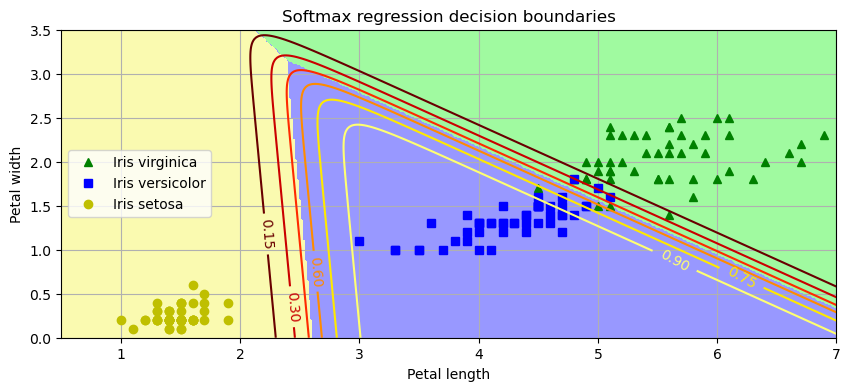

In [328]:
# show decision boundaries by the background colors

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

figj, axej = plt.subplots(figsize=(10, 4))
axej.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
axej.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
axej.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

axej.contourf(x0, x1, zz, cmap=custom_cmap)
contour = axej.contour(x0, x1, zz1, cmap="hot")
axej.clabel(contour, inline=1)
axej.set(xlabel="Petal length", ylabel="Petal width", title='Softmax regression decision boundaries')
axej.legend(loc="center left")
axej.axis([0.5, 7, 0, 3.5])
axej.grid()

- the probabilities for the Iris versicolor class, represented by the curved lines
- at the point where all decision boundaries meet, all classes have an equal estimated
probability of 33%